<a href="https://colab.research.google.com/github/rasmibhattarai72/dog-cat/blob/main/cornB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install split-folders

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
import cv2
import random
import tensorflow as tf

In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio('/content/drive/MyDrive/corn', output='output', seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 3852 files [00:08, 446.13 files/s]


In [ ]:
import pathlib
import PIL

corn_1 = os.path.join('/content/output/train/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (116).JPG')

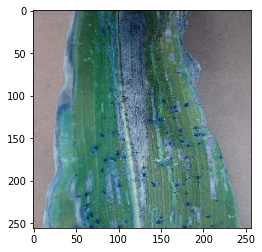

In [ ]:
#without gray scale
corn = cv2.imread(corn_1)
plt.imshow(corn)
plt.show();

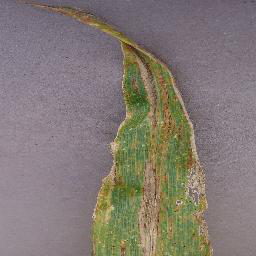

In [ ]:
corn_2 = os.path.join('/content/output/train/Corn___Northern_Leaf_Blight/image (104).JPG')

PIL.Image.open(str(corn_2))

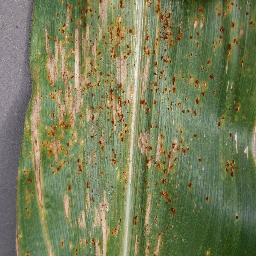

In [ ]:
corn_3 = os.path.join('/content/output/train/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (105).JPG')

PIL.Image.open(str(corn_3))

In [ ]:
#importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

#initializing the CNN
classifier = Sequential()

#Convolution
classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation="relu"))

#Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Adding a second Convolutional layer
classifier.add(Conv2D(32,(3,3), activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Flattening
classifier.add(Flatten())

#Full Connection
classifier.add(Dense(units=128, activation="relu"))
classifier.add(Dense(units=4, activation="sigmoid"))


In [ ]:

#Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#to see the layers
classifier.layers

In [ ]:
#to see the summary of our model
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_7 (Dense)              (None, 4)                

In [ ]:
#Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range= 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/output/train',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/output/test',
                                            target_size =(64,64),
                                            batch_size=32,
                                            class_mode = 'categorical')

valid_set = valid_datagen.flow_from_directory('/content/output/val',
                                              target_size=(64,64),
                                              batch_size=32,
                                              class_mode='categorical')


Found 3080 images belonging to 4 classes.
Found 388 images belonging to 4 classes.
Found 384 images belonging to 4 classes.


In [ ]:
history = classifier.fit_generator(training_set, steps_per_epoch=len(training_set)//3, epochs=20, validation_data=valid_set, validation_steps=len(valid_set)//3)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
32/32 [==============================] - 9s 248ms/step - loss: 1.1032 - accuracy: 0.5639 - val_loss: 0.4586 - val_accuracy: 0.7969
Epoch 2/20
32/32 [==============================] - 8s 242ms/step - loss: 0.3770 - accuracy: 0.8548 - val_loss: 0.3291 - val_accuracy: 0.8672
Epoch 3/20
32/32 [==============================] - 8s 237ms/step - loss: 0.3588 - accuracy: 0.8447 - val_loss: 0.4354 - val_accuracy: 0.7969
Epoch 4/20
32/32 [==============================] - 7s 230ms/step - loss: 0.3526 - accuracy: 0.8547 - val_loss: 0.3560 - val_accuracy: 0.8516
Epoch 5/20
32/32 [==============================] - 7s 230ms/step - loss: 0.2828 - accuracy: 0.8790 - val_loss: 0.2776 - val_accuracy: 0.8672
Epoch 6/20
32/32 [==============================] - 7s 231ms/step - loss: 0.3379 - accuracy: 0.8624 - val_loss: 0.2289 - val_accuracy: 0.8906
Epoch 7/20
32/32 [==============================] - 7s 231ms/step - loss: 0.2511 - accuracy: 0.8899 - val_loss: 0.5728 - val_accuracy: 0.7969
Epoch 

In [ ]:
classifier.evaluate(test_set)

13/13 [==============================] - 1s 76ms/step - loss: 0.1991 - accuracy: 0.9201


[0.19905796647071838, 0.9201030731201172]

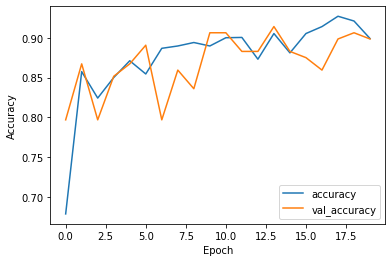

In [ ]:
#Plotting loss and accuracy of training and validation set
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

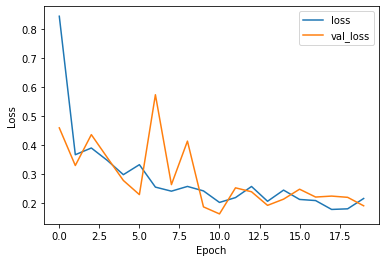

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();